## Import dependencies and data

In [1]:
#import dependencies
import pandas as pd
import json
import matplotlib.pyplot as plt


In [2]:
path = "../data/clean_data.json"

#### Converting the json to a dataframe for analysis

In [3]:
df = pd.read_json(path)
df.head()

,title,company_name,location,via,description,extensions,schedule_type,work_from_home,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,"Data analyst | Wichita, KS | Fulltime",Dice,"Wichita, KS",via LinkedIn,"Role: Data analyst Location: Wichita, KS (Day ...","['12 hours ago', 'Full-time', 'No degree menti...",Full-time,NaN,NaN,NaN,NaN,"['excel', 'tableau', 'vba', 'power_bi']"
1,Quality Measures Data Analyst (Remote),Talentify.io,Anywhere,via LinkedIn,Talentify helps candidates around the world to...,"['13 hours ago', 'Work from home', 'Full-time']",Full-time,1.0,NaN,NaN,NaN,"['visio', 'word', 'sql', 'tableau', 'powerpoin..."
2,Senior Data Analyst,Naviguard,United States,via My Stateline Jobs,Senior Data Analyst\nAs a Senior Data Analyst ...,"['8 hours ago', 'Full-time']",Full-time,NaN,NaN,NaN,NaN,['sql']
3,EDI Data Analyst/Business Systems Analyst III ...,Talentify.io,Anywhere,via LinkedIn,Talentify helps candidates around the world to...,"['13 hours ago', 'Work from home', 'Full-time']",Full-time,1.0,NaN,NaN,NaN,[]
4,Data Analyst that can read and find places onl...,Upwork,Anywhere,via Upwork,My company is evaluating hundreds of counties ...,"['8 hours ago', 'Work from home', 'Contractor'...",Contractor,1.0,NaN,NaN,NaN,"['spreadsheet', 'excel', 'go']"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20435 entries, 0 to 20434
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                20435 non-null  object 
 1   company_name         20435 non-null  object 
 2   location             20420 non-null  object 
 3   via                  20435 non-null  object 
 4   description          20435 non-null  object 
 5   extensions           20435 non-null  object 
 6   schedule_type        20306 non-null  object 
 7   work_from_home       9093 non-null   float64
 8   salary_hourly        2286 non-null   float64
 9   salary_yearly        1601 non-null   float64
 10  salary_standardized  3893 non-null   float64
 11  description_tokens   20435 non-null  object 
dtypes: float64(4), object(8)
memory usage: 1.9+ MB


## Work From Home vs. In Office Postings

In [5]:
# Convert the column type to string
df['work_from_home'] = df['work_from_home'].astype(str)

# Change the values to make them more descriptive
df.loc[df['work_from_home'] == 'nan', 'work_from_home'] = 'office'
df.loc[df['work_from_home'] == '1.0', 'work_from_home'] = 'remote'

In [6]:
remote_df = df['work_from_home'].value_counts().rename_axis('wfh').reset_index(name='count')
remote_df['type'] = ['In Office', 'Remote']
remote_df = remote_df.set_index('type')
remote_df

,wfh,count
type,,
In Office,office,11342
Remote,remote,9093


<Figure size 7200x7200 with 0 Axes>

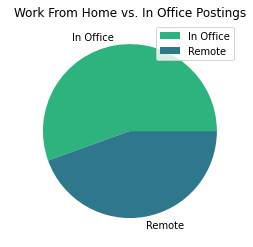

In [7]:
plt.figure(figsize=(100, 100))
remote_df.plot.pie(y='count', colors = ['#2eb37e', '#2e778d'])
plt.title('Work From Home vs. In Office Postings')
plt.ylabel(' ')
plt.savefig('../static/images/wfh_office.png', bbox_inches = 'tight')
plt.show()

## Salary Standardized to Yearly Pay

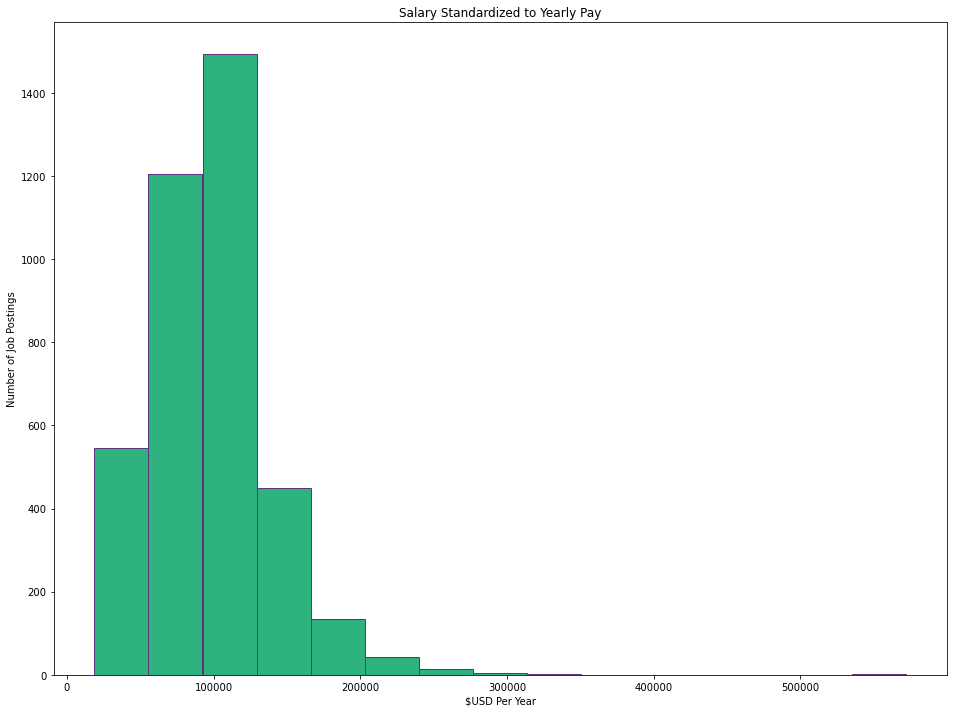

In [8]:
salary_list = list(df['salary_standardized'])

plt.figure(figsize=(16,12))
plt.hist(salary_list, bins = 15, color = "#2EB37E", ec="#5C367F")
plt.title('Salary Standardized to Yearly Pay')
plt.ylabel('Number of Job Postings')
plt.xlabel('$USD Per Year')
plt.savefig('../static/images/salary_standardized.png', bbox_inches = 'tight')
plt.show()

## Number of Postings Per Job Title (Top 10)

In [9]:
title_df = df['title'].value_counts()
title_df

Data Analyst                                                   2552
Senior Data Analyst                                             741
Data Analyst II                                                 336
Lead Data Analyst                                               288
Sr. Data Analyst, Marketing Operations                          266
                                                               ... 
Data analysis excel                                               1
Google Analytics expert et formateur                              1
Timeseries Data Analysis using Python on MongoDB and Oracle       1
Teaching how to use inverse poisson in excel                      1
Lead FP&A Analyst- Remote, US                                     1
Name: title, Length: 7847, dtype: int64

In [10]:
#convert all job titles to lowercase to account for inconsistencies in casing
df['title'] = df['title'].str.lower()
#convert to title case
df['title'] = df['title'].str.title()
title_lc_df = df['title'].value_counts()
title_lc_df.head(10)

Data Analyst                              2676
Senior Data Analyst                        752
Data Analyst Ii                            367
Lead Data Analyst                          292
Sr. Data Analyst, Marketing Operations     266
Business Data Analyst                      228
Data Scientist                             166
Data Analyst Iii                           132
Sr. Data Analyst                           119
Marketing Data Analyst                     117
Name: title, dtype: int64

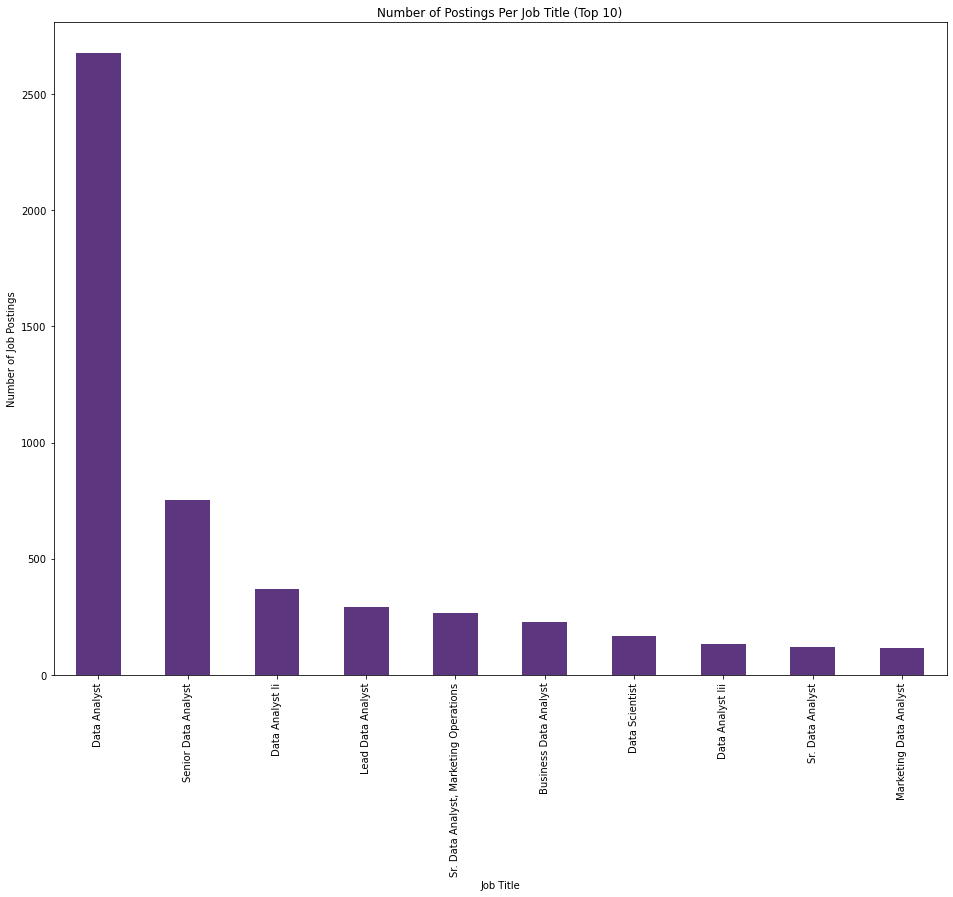

In [11]:
#filter top 10 job titles
top_ten_titles = title_lc_df.head(10)
plt.figure(figsize=(16,12))
top_ten_titles.plot(kind='bar', color= '#5C367F')
plt.ylabel('Number of Job Postings')
plt.xlabel('Job Title')
plt.title('Number of Postings Per Job Title (Top 10)')
#plt.xticks(rotation = 45)
plt.savefig('../static/images/postings_per_title.png', bbox_inches = 'tight')
plt.show()

Title vs Salary comparison

In [12]:
#create new dataframe with only the job title and salary information for comparison
title_salary_df = df[['title', 'salary_standardized']]
title_salary_df

,title,salary_standardized
0,"Data Analyst | Wichita, Ks | Fulltime",NaN
1,Quality Measures Data Analyst (Remote),NaN
2,Senior Data Analyst,NaN
3,Edi Data Analyst/Business Systems Analyst Iii ...,NaN
4,Data Analyst That Can Read And Find Places Onl...,NaN
...,...,...
20430,Marketing Data & Bi Analyst Ii,103781.0
20431,Lead-Data Analyst,144481.5
20432,Lead-Data Analyst,144481.5
20433,Lead-Data Analyst,144481.5


In [13]:
#drop NaN values from salary column
title_salary_df = title_salary_df.dropna()
title_salary_df


,title,salary_standardized
10,Data Management,119600.0
11,"Sr. Data Analyst, Marketing Operations",96500.0
19,"Sr. Data Analyst, Marketing Operations",96500.0
22,"Sr. Data Analyst, Marketing Operations",96500.0
30,"Sr. Data Analyst, Marketing Operations",96500.0
...,...,...
20430,Marketing Data & Bi Analyst Ii,103781.0
20431,Lead-Data Analyst,144481.5
20432,Lead-Data Analyst,144481.5
20433,Lead-Data Analyst,144481.5


In [14]:
#filter by the top ten job titles and gather average salary info
title_for_ave = ['Data Analyst', 'Senior Data Analyst', 'Lead Data Analyst', 'Data Analyst Ii', 'Sr. Data Analyst, Marketing Operations', 'Business Data Analyst', 'Senior Data Analyst, Business Optimization', 'Data Scientist', 'Junior Data Analyst', 'Senior Performance Marketing (Data Analyst)']
ave_salary = []

for t in title_for_ave:
    filter = title_salary_df.loc[title_salary_df['title'] == t]
    ave_salary.append(filter['salary_standardized'].mean())


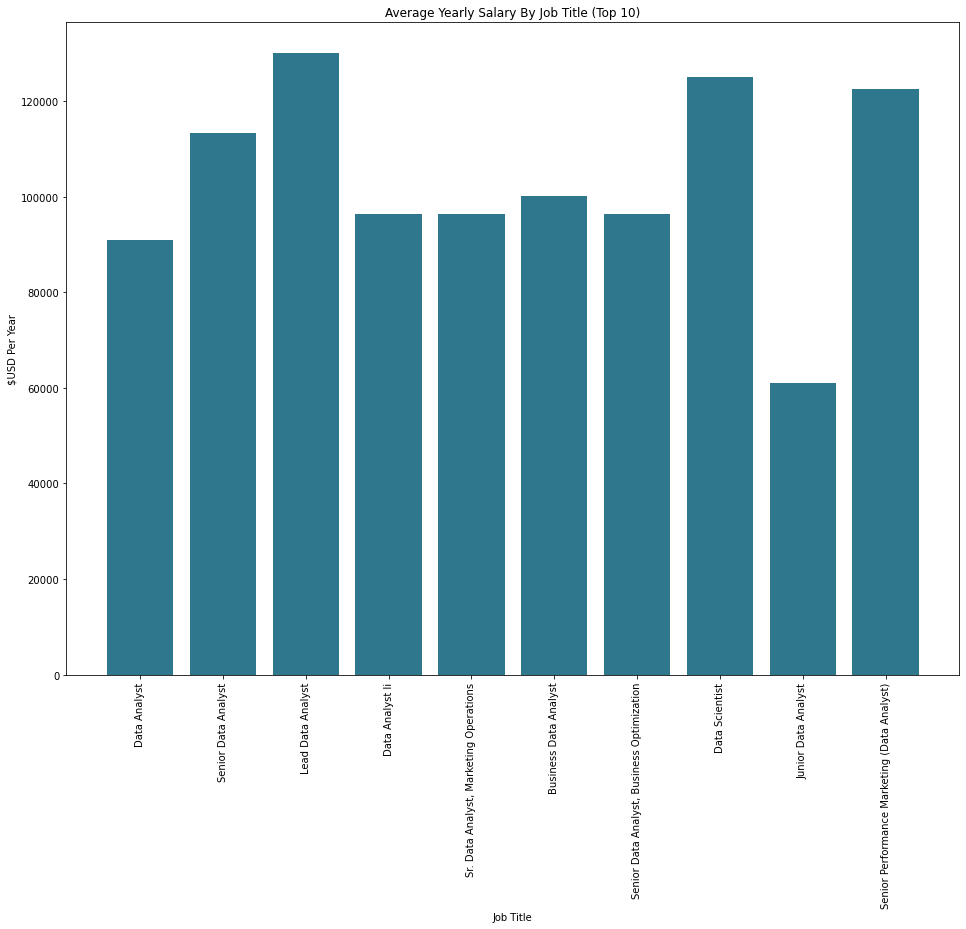

In [15]:
plt.figure(figsize=(16,12))
plt.bar(title_for_ave, ave_salary, color = '#2E778D')
plt.ylabel('$USD Per Year')
plt.xlabel('Job Title')
plt.title('Average Yearly Salary By Job Title (Top 10)')
plt.xticks(rotation = 90)
plt.savefig('../static/images/salary_per_title.png',bbox_inches = 'tight')
plt.show()

## Location of job posting

In [30]:
post_df = df['via'].value_counts()
post_df.head(10)

via LinkedIn             6629
via Upwork               3128
via Trabajo.org          1473
via BeBee                1395
via ZipRecruiter         1289
via Indeed               1113
via Adzuna                410
via Snagajob              379
via Monster               335
via My ArkLaMiss Jobs     276
Name: via, dtype: int64

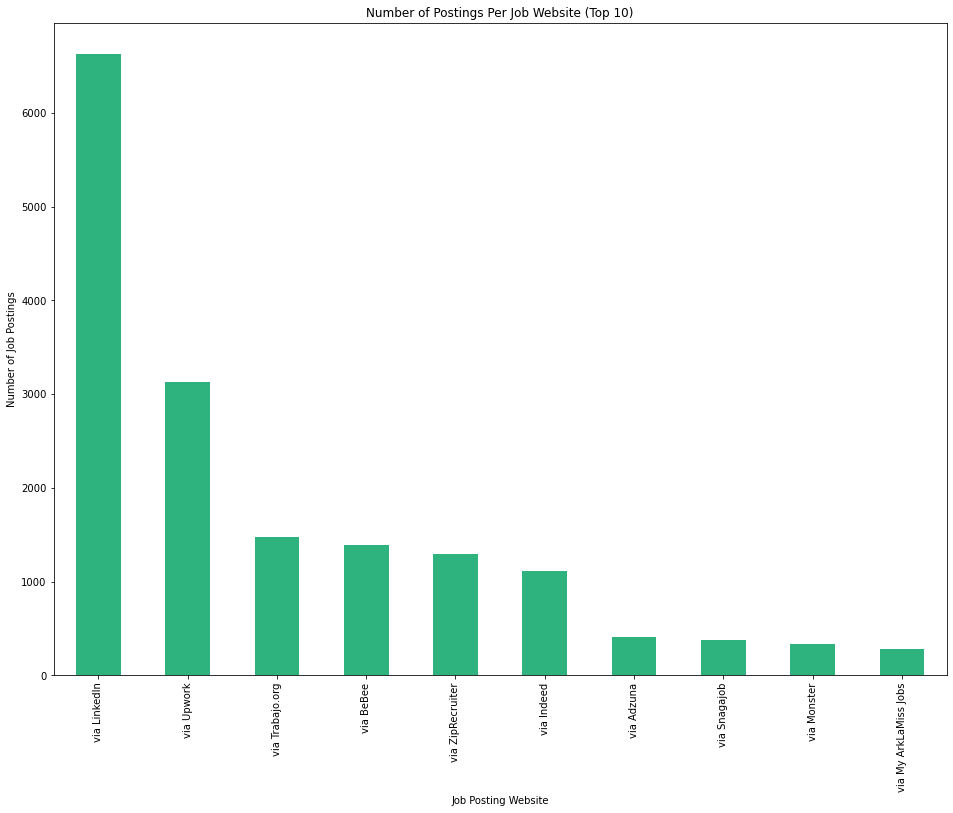

In [33]:
#filter top 10 job titles
top_ten_post = post_df.head(10)
plt.figure(figsize=(16,12))
top_ten_post.plot(kind='bar', color= '#2EB37E')
plt.ylabel('Number of Job Postings')
plt.xlabel('Job Posting Website')
plt.title('Number of Postings Per Job Website (Top 10)')
plt.show()